In [368]:
import pandas as pd
import numpy as np
import json
import math
import sys

df=pd.read_csv("C:\\Users\\giuli\\project_w_EXP\\man-shoes\\Datafiniti_Mens_Shoe_Prices.csv", error_bad_lines=False)
df=df[df['prices.currency']=='USD']



b'Skipping line 251: expected 48 fields, saw 49\nSkipping line 444: expected 48 fields, saw 50\nSkipping line 847: expected 48 fields, saw 49\nSkipping line 848: expected 48 fields, saw 49\nSkipping line 1018: expected 48 fields, saw 49\nSkipping line 1575: expected 48 fields, saw 51\nSkipping line 2133: expected 48 fields, saw 49\nSkipping line 2922: expected 48 fields, saw 51\nSkipping line 3777: expected 48 fields, saw 51\nSkipping line 4057: expected 48 fields, saw 49\nSkipping line 4239: expected 48 fields, saw 49\nSkipping line 4240: expected 48 fields, saw 49\nSkipping line 4384: expected 48 fields, saw 49\nSkipping line 4385: expected 48 fields, saw 49\nSkipping line 5388: expected 48 fields, saw 49\nSkipping line 5480: expected 48 fields, saw 49\nSkipping line 5481: expected 48 fields, saw 49\nSkipping line 5907: expected 48 fields, saw 50\nSkipping line 5908: expected 48 fields, saw 50\nSkipping line 6600: expected 48 fields, saw 49\nSkipping line 6601: expected 48 fields, sa

__estrazione materiale

In [ ]:
def extract_material(features_json):
    # [{"key":"Material","value":["Suede"]},{"key":"Gender","value":["Men"]},{"key":"Color","value":["Beige"]},{"key":"Model","value":["M254TNN"]},{"key":"Manufacturer Part Number","value":["M254TNN"]},{"key":"Brand","value":["New Balance Numeric"]},{"key":"Age Group","value":["Adult"]}]    
    try:
        if (type(features_json) == float):
            return None
        
        if (type(features_json) != str):
            print( f"WARN not a string but a {type(features_json)} {features_json}" )
            return None
        
        features_json = features_json.replace("\\\\", "\\")
        kvs = json.loads(features_json)
        for kv in kvs:
            if(kv["key"] == "Material"):
                return kv["value"][0]
            
        return None
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        print( f"WARN '{err_type}' '{err_value}' parsing {features_json}" )
        return None
    

    
df["material"] = df["features"].apply( extract_material )

__creazione colonna prezzo medio__

In [371]:
df["prices.amountMax"] = pd.to_numeric(df["prices.amountMax"])
df["prices.amountMin"] = pd.to_numeric(df["prices.amountMin"])
df['medium.price']=(df['prices.amountMin']+df['prices.amountMax'])/2

__restrizione DF a sole colonne di interesse__

In [372]:
df=df[['medium.price', 'material']]

In [373]:
t=df.dropna() # ci liberiamo dei valori nulli
t

,medium.price,material
10,45.00,Synthetic
11,7.99,Synthetic
12,9.99,Synthetic
13,9.99,Synthetic
14,19.99,Synthetic
...,...,...
19291,25.99,Suede
19306,65.99,Synthetic
19307,58.99,Synthetic
19308,34.99,Leather


In [ ]:
#verifichiamo come sono distribuiti i materiali. Notiamo molte ripetizioni 

In [374]:
p=(t.groupby('material').count()).sort_values(by=['medium.price'], ascending=False)

p[p['medium.price']>10]

,medium.price
material,
Leather,1834
Synthetic,1067
Canvas,735
Suede,522
Polyester,149
Rubber,119
100% Cotton,108
Mesh,94
Multi,77


__procediamo con la pulizia, l'accorpamento, e la razionalizzazione dei materiali__

In [375]:
def m(x):
    if x=='Cotton Blend' or x=='Cotton blend':
        x='Cotton Blends'
        return x
    else:
        return x
    


In [376]:
def m1(x):
    for i in x:
        return m(x)

In [377]:
t['material']=t['material'].apply(m1)

C:\Users\giuli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [378]:
p=(t.groupby('material').count()).sort_values(by=['medium.price'], ascending=False)

p[p['medium.price']>5]

,medium.price
material,
Leather,1834
Synthetic,1067
Canvas,735
Suede,522
Polyester,149
...,...
Man-made Upper Suede Trim Rubber Sole,6
Manmade Upper Leather Interior Rubber Outsole,6
Nylon twill (bonding finish on polyester,6


In [379]:
t=t[t['material']!='Unknown']


In [380]:
t=t[t['material']!='Textile']

In [381]:
t=t[t['material']!='Fabric']

In [382]:
t=t[t['material']!='Other']

In [383]:
t=t[t['material']!='Multi']

In [384]:
def m(x):
    if x=='100 percent cotton':
        x='100% Cotton'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [385]:
def m(x):
    if x=='Fleece' or x=='56% Copper Nylon/28% Nylon/16% Spandex':
        x='Polyester Blend'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [386]:
def m(x):
    if x=='Leather & suede' or x=='Genuine Suede':
        x='Suede'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [387]:
def m(x):
    if x=='Cotton':
        x='Cotton Blends'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [388]:
def m(x):
    if x=='100%polyester':
        x='100% Polyester'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [389]:
def m(x):
    if x=='PVC' or x=='Plastic':
        x='Plastica'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [390]:
def m(x):
    if x=='SS304 Stainless Steel / Nylon Coating':
        x='Nylon'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [391]:
def m(x):
    if x=='100% Leather Sole ,�� 85% Ragg Woold 15% Nylon Upper' or x=='Leather-And-Synthetic':
        x='Synthetic-And-Leather'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [392]:
def m(x):
    if x=='canvas' or x=='Canvas||Gum Rubber':
        x='Canvas'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [393]:
def m(x):
    if x=='Leather & suede' or x=='Genuine Suede' or x=='suede':
        x='Suede'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [394]:
def m(x):
    if x=='100% Polyester' or x=='Polyester':
        x='Polyester Blend'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [395]:
def m(x):
    if x=='Synthetic-And-Mesh':
        x='Mesh'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [396]:
def m(x):
    if x=='Synthetics':
        x='Synthetic'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [397]:
def m(x):
    if x=='Textile Upper Rubber Outsole' or x=='Man-made Upper Suede Trim Rubber Sole':
        x='Rubber'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [398]:
def m(x):
    if x=='Textile Upper Rubber Outsole' or x=='Man-made Upper Suede Trim Rubber Sole':
        x='Rubber'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [399]:
def m(x):
    if x=='Genuine Leather' or x=='Leather/Man Made':
        x='Leather'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

In [400]:
def m(x):
    if x=='EVA Foam Rubber & Textile Strap':
        x='Rubber'
        return x
    else:
        return x

def m1(x):
    for i in x:
        return m(x)
    
t['material']=t['material'].apply(m1)

__vogliamo creare una colonna dove segnalare se l'articolo è fatto con materiali naturali__

In [401]:
def natural(x):
    n={'Canvas', 'Corduroy', 'Linen', 'Canvas', 'Rubber', '100% Cotton', 'Cotton Blends'}
    p=''
    for i in n:
        if i in x:
            p=p+i
            return p
    else:
            return False

def g(x):
    for i in x:
        return natural(x)
    
t['Natural_Fabric']= t['material'].apply(g)
        

In [402]:
t

,medium.price,material,Natural_Fabric
10,45.00,Synthetic,False
11,7.99,Synthetic,False
12,9.99,Synthetic,False
13,9.99,Synthetic,False
14,19.99,Synthetic,False
...,...,...,...
19291,25.99,Suede,False
19306,65.99,Synthetic,False
19307,58.99,Synthetic,False
19308,34.99,Leather,False


__prendiamo in esame solo gli articoli con materiale naturale e creiamo il grafico __

In [403]:
df_nat=t[t['Natural_Fabric']!=False]

df_nat

,medium.price,material,Natural_Fabric
42,43.98,Canvas,Canvas
43,110.00,Canvas,Canvas
44,24.99,Canvas,Canvas
45,31.99,Canvas,Canvas
47,56.99,Canvas,Canvas
...,...,...,...
19261,46.99,Canvas,Canvas
19265,13.99,Canvas,Canvas
19266,95.00,Canvas,Canvas
19267,16.99,Canvas,Canvas


In [404]:
p=df_nat.groupby('Natural_Fabric').mean().sort_values(by=['medium.price'], ascending=False)

p

,medium.price
Natural_Fabric,
Linen,189.120000
Canvas,53.174644
Rubber,43.351416
100% Cotton,33.373684
Cotton Blends,29.670569
Corduroy,20.321667


In [405]:
import matplotlib.pyplot as plot

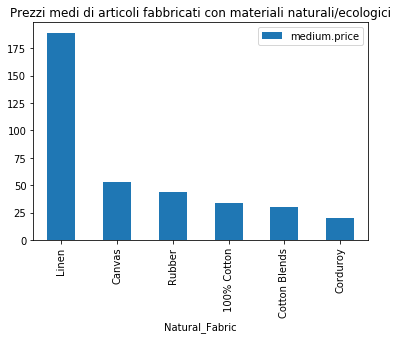

In [406]:
p.plot.bar(title="Prezzi medi di articoli fabbricati con materiali naturali/ecologici")

plot.show(block=True)